In [12]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #,Imputer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
#Read dataset
df = pd.read_csv('datasetwithoutexploit.csv')

In [3]:
# Groupement des classes
attack_group = {'Infilteration': 'Web attack', 
                'Fuzzers': 'Web attack',
                'Generic': 'Web attack',
                'injection': 'Web attack', 
                'Analysis': 'Web attack',
                'xss': 'Web attack',
                'Benign': 'BENIGN',
                'backdoor': 'BACKDOOR', 
                'scanning': 'SCANNING',
                'mitm': 'MITM', 
                'dos': 'DOS', 
                'ddos': 'DDOS', 
                'bruteforce': 'BRUTEFORCE', 
                'Theft': 'THEFT', 
                'Reconnaissance': 'RECON',
                'Shellcode': 'SHELLCODE',
                'ransomware': 'RANSOMWARE',
                'Bot': 'BOT',
                }
# Creation d'une colomne Attack catégorie
df['Attack_Category'] = df['Attack'].map(lambda x: attack_group[x])
df['Attack_Category'].value_counts()

BENIGN        41002
Web attack    14667
DDOS           2506
SCANNING       2500
RECON          2498
DOS            2497
RANSOMWARE     2493
BOT            2489
BACKDOOR       2485
BRUTEFORCE     2485
MITM           2471
THEFT          2431
SHELLCODE      1427
Name: Attack_Category, dtype: int64

In [4]:
df.Label.value_counts()

0    41002
1    40949
Name: Label, dtype: int64

In [5]:
df.Attack_Category.value_counts()

BENIGN        41002
Web attack    14667
DDOS           2506
SCANNING       2500
RECON          2498
DOS            2497
RANSOMWARE     2493
BOT            2489
BACKDOOR       2485
BRUTEFORCE     2485
MITM           2471
THEFT          2431
SHELLCODE      1427
Name: Attack_Category, dtype: int64

In [6]:
df.Attack.value_counts()

Benign            41002
ddos               2506
scanning           2500
Reconnaissance     2498
dos                2497
ransomware         2493
Infilteration      2491
Fuzzers            2490
Bot                2489
Generic            2487
bruteforce         2485
backdoor           2485
mitm               2471
xss                2457
injection          2443
Theft              2431
Analysis           2299
Shellcode          1427
Name: Attack, dtype: int64

In [7]:
cols = list(df)
cols.insert(43, cols.pop(cols.index('Attack')))
df = df.loc[:, cols]

In [8]:
df

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,...,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack_Category,Attack
0,0.582666,0.006790,0.023529,0.172269,0.000048,0.000264,0.000002,0.000246,0.139013,0.121076,...,0.125002,0.0,0.0,0.0,0.0,0.0,0.0,1,RANSOMWARE,ransomware
1,0.583490,0.006790,0.023529,0.172269,0.000024,0.000122,0.000001,0.000123,0.139013,0.121076,...,0.125002,0.0,0.0,0.0,0.0,0.0,0.0,1,RANSOMWARE,ransomware
2,0.672023,0.006790,0.023529,0.172269,0.000024,0.000122,0.000001,0.000123,0.139013,0.121076,...,0.125002,0.0,0.0,0.0,0.0,0.0,0.0,1,RANSOMWARE,ransomware
3,0.523156,0.006790,0.023529,0.172269,0.000024,0.000122,0.000001,0.000123,0.139013,0.121076,...,0.125002,0.0,0.0,0.0,0.0,0.0,0.0,1,RANSOMWARE,ransomware
4,0.578912,0.006790,0.023529,0.172269,0.000024,0.000122,0.000001,0.000123,0.139013,0.121076,...,0.125002,0.0,0.0,0.0,0.0,0.0,0.0,1,RANSOMWARE,ransomware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81946,0.643442,0.001221,0.023529,0.028226,0.001525,0.000541,0.000018,0.000221,0.102804,0.030303,...,0.644208,0.0,0.0,0.0,0.0,0.0,0.0,1,RECON,Reconnaissance
81947,0.675822,0.001221,0.023529,0.028226,0.001525,0.000541,0.000018,0.000221,0.102804,0.030303,...,0.644208,0.0,0.0,0.0,0.0,0.0,0.0,1,RECON,Reconnaissance
81948,0.642741,0.001221,0.023529,0.028226,0.001525,0.000541,0.000018,0.000221,0.102804,0.030303,...,0.644208,0.0,0.0,0.0,0.0,0.0,0.0,1,RECON,Reconnaissance
81949,0.624186,0.001221,0.023529,0.028226,0.001525,0.000541,0.000018,0.000221,0.102804,0.030303,...,0.644208,0.0,0.0,0.0,0.0,0.0,0.0,1,RECON,Reconnaissance


### split train set and test set

In [9]:
X = df.drop(['Label','Attack','Attack_Category'],axis=1).values 
y = df.iloc[:, -3].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 42,stratify = y)
print(X_train.shape)
print(X_test.shape)

(65560, 41)
(16391, 41)


In [10]:
pd.Series(y_train).value_counts()

0    32801
1    32759
dtype: int64

### Training : Gradient Boosting

## Training Loop

In [14]:
from sklearn.utils import shuffle

In [15]:
data_train=pd.DataFrame(X_train)
data_train['label']=y_train

In [80]:
val_score=[]
model = GradientBoostingClassifier(n_estimators=100, random_state=30)
start = time.time()
for i in range(1,9):
    data_train=shuffle(data_train)
    X=data_train.iloc[:,:41] 
    y=data_train.iloc[:,41]
    model.fit(X,y) 
    score=model.score(X,y)
    print('EPOCH ',i,'\t ACCURACY= ',score)
    val_score.append(score)    
end = time.time()
training_time = end  - start

EPOCH  1 	 ACCURACY=  0.9999694935936546
EPOCH  2 	 ACCURACY=  0.9999694935936546
EPOCH  3 	 ACCURACY=  0.9999694935936546
EPOCH  4 	 ACCURACY=  0.9999694935936546
EPOCH  5 	 ACCURACY=  0.9999694935936546
EPOCH  6 	 ACCURACY=  0.9999694935936546
EPOCH  7 	 ACCURACY=  0.9999694935936546
EPOCH  8 	 ACCURACY=  0.9999694935936546


Text(0, 0.5, 'score')

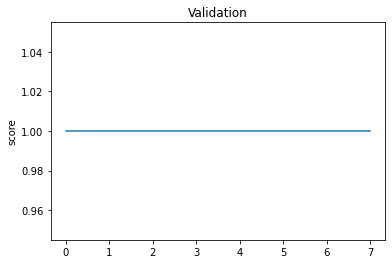

In [81]:
plt.plot(val_score)
plt.title('Validation')
plt.ylabel('score')

In [82]:
start = time.time()
y_predict=model.predict(X_test)
end = time.time()
predict_time = end  - start

In [83]:
print('temps entrainement: '+ str(training_time))
print('temps prediction: '+ str(predict_time))

temps entrainement: 296.1378493309021
temps prediction: 0.08055949211120605


In [84]:
precision,recall,fscore,none= precision_recall_fscore_support(y_test, y_predict, average='weighted') 
print('temps entrainement: '+ str(training_time))
print('temps prediction: '+ str(predict_time))
print("Exactitude de RF: {}".format(accuracy_score(y_test,y_predict)))
print('Précision de RF: '+(str(precision)))
print('Taux de détection de RF: '+(str(recall)))
print('F1-score de RF: '+(str(fscore)))
print("ERROR SCORE : {}".format(1-accuracy_score(y_test,y_predict)))

temps entrainement: 296.1378493309021
temps prediction: 0.08055949211120605
Exactitude de RF: 0.9999389909096456
Précision de RF: 0.9999389983579534
Taux de détection de RF: 0.9999389909096456
F1-score de RF: 0.9999389909119165
ERROR SCORE : 6.1009090354446904e-05


In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm=confusion_matrix(y_test, y_predict)
cm

array([[8200,    1],
       [   0, 8190]], dtype=int64)

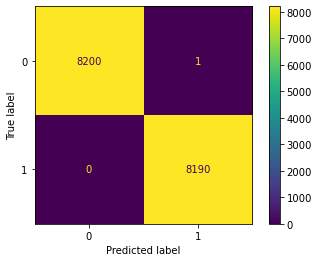

In [86]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()